<a href="https://colab.research.google.com/github/fatimazain118/ML/blob/main/Lab3/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np 
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import logging,sys


In [37]:
from google.colab import drive  
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
df = pd.read_csv("/content/gdrive/MyDrive/binary.csv.zip") 

In [39]:
df.columns

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')

In [40]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


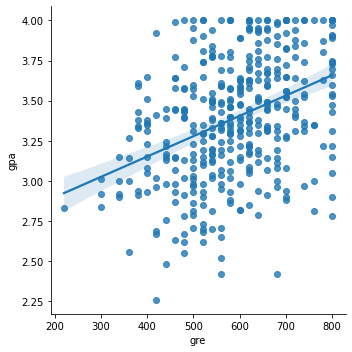

In [41]:
import seaborn as sns
sns.lmplot(x = "gre", y = "gpa", data = df)

In [42]:
df["rank"].unique()

array([3, 1, 4, 2])

In [43]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

In [44]:
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


Diagonal is all 1's because each feature is 100% correlated with itself.

In [45]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression   #Classification

In [46]:
df.corr()   

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


# Logistic Regression

In [47]:

#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.10,
                                                   random_state= 66)

In [48]:
clf_entropy=LogisticRegression()

In [49]:
clf_entropy.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [51]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tn, fp, fn, tp = cM.ravel()    #tn= not admitted #0=admitted, 1= not admitted
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)


[[30  3]
 [ 3  4]]
Recall = Sensitivity =  0.5714285714285714
Specificity = 0.9090909090909091
Accuracy= 0.85
Precision= 0.5714285714285714
f1 score= 0.5714285714285714


In [52]:
#For area under the curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(Y_test,predicted_entropy)
aucP = auc(fpr, tpr)
aucP

0.7402597402597403

In [53]:
clf_entropy.coef_

array([[ 0.72918256,  0.00224001, -0.50507836]])

In [54]:
clf_entropy.intercept_

array([-3.30850034])